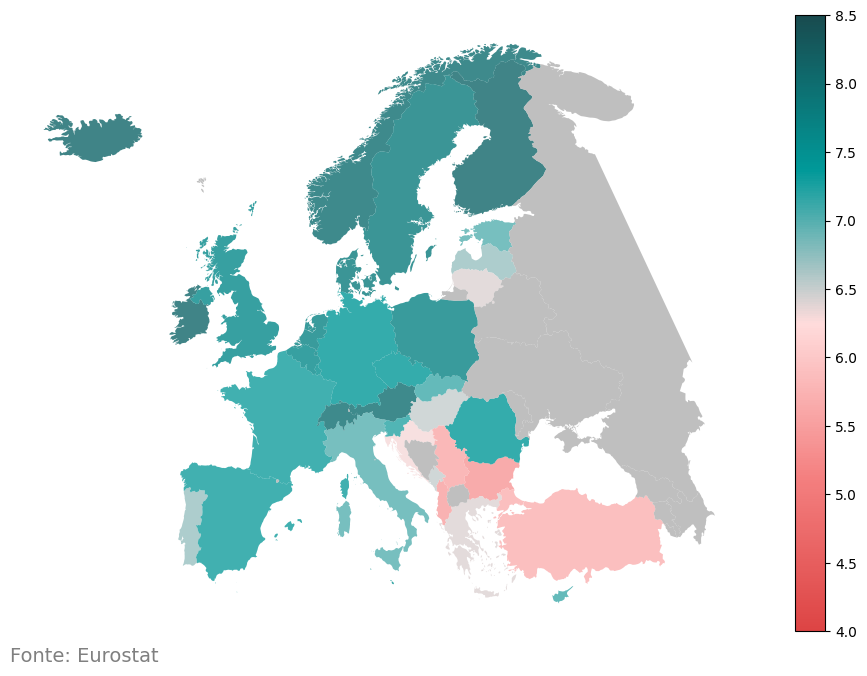

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

qol_data = pd.read_csv(r"..\data\overall_life_satisfaction\estat_ilc_pw01_filtered_en.csv", usecols= ['geo','TIME_PERIOD','OBS_VALUE'])
qol_data = qol_data.loc[qol_data.groupby('geo')['TIME_PERIOD'].apply(lambda x: (x - 2013).abs().idxmin())]
#qol_data = qol_data.loc[qol_data.groupby('geo')['TIME_PERIOD'].apply(lambda x: (x - 2018).abs().idxmin())]
#qol_data = qol_data.loc[qol_data.groupby('geo')['TIME_PERIOD'].idxmax()]
qol_data.loc[qol_data['geo'] == 'Czechia', 'geo'] = 'Czech Republic'
qol_data.loc[qol_data['geo'] == 'Türkiye', 'geo'] = 'Turkey'

europe_map = gpd.read_file("..\data\europe_map\europe.geojson")
europe_map = europe_map.merge(qol_data, left_on='NAME', right_on='geo', how='left')
europe_map = europe_map.to_crs(epsg=4326)

cmap = mcolors.LinearSegmentedColormap.from_list(
    "diverging", ['#dd4444', '#f48080', '#ffdcdc', '#009999', '#194b4f']
)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
europe_map.plot(
    column='OBS_VALUE',
    cmap=cmap,
    legend=True,
    vmin= 4,
    vmax=8.5,
    missing_kwds={"color": "#B0B0B0"},
    ax=ax,
    alpha=0.8
)

ax.set_axis_off()
plt.text(
    0, -0.05,  # Posizione
    "Fonte: Eurostat",
    fontsize=14,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)
plt.savefig(r'..\..\map_2013_satisfaction.png', transparent=True)